In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#As data is in the CSV file, we will read the CSV using pandas read_csv function and check the first 5 rows of the data frame using head().
HouseDF = pd.read_csv('India_Housing.csv')
HouseDF.head()

,Unnamed: 0,Avg.Area Income(in 1000Rs),Avg.House Age,Avg.Area Number Of Bedrooms,Area Population(in 1000s),Price(in Lacs)
0,0,79.545,5.68,4.09,23.086,180.54
1,1,79.248,6.00,3.09,40.173,150.45
2,2,61.287,5.86,5.04,36.882,60.65
3,3,63.345,7.18,3.09,34.410,67.54
4,4,59.982,5.04,4.14,26.345,45.98


In [3]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   5 non-null      int64  
 1   Avg.Area Income(in 1000Rs)   5 non-null      float64
 2   Avg.House Age                5 non-null      float64
 3   Avg.Area Number Of Bedrooms  5 non-null      float64
 4   Area Population(in 1000s)    5 non-null      float64
 5   Price(in Lacs)               5 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 368.0 bytes


In [4]:
HouseDF.describe()

,Unnamed: 0,Avg.Area Income(in 1000Rs),Avg.House Age,Avg.Area Number Of Bedrooms,Area Population(in 1000s),Price(in Lacs)
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2.000000,68.681400,5.952000,3.890000,32.179200,101.032000
std,1.581139,9.855262,0.778537,0.822344,7.206209,60.305065
min,0.000000,59.982000,5.040000,3.090000,23.086000,45.980000
25%,1.000000,61.287000,5.680000,3.090000,26.345000,60.650000
50%,2.000000,63.345000,5.860000,4.090000,34.410000,67.540000
75%,3.000000,79.248000,6.000000,4.140000,36.882000,150.450000
max,4.000000,79.545000,7.180000,5.040000,40.173000,180.540000


In [5]:
HouseDF.columns

Index(['Unnamed: 0', 'Avg.Area Income(in 1000Rs)', 'Avg.House Age',
       'Avg.Area Number Of Bedrooms', 'Area Population(in 1000s)',
       'Price(in Lacs)'],
      dtype='object')

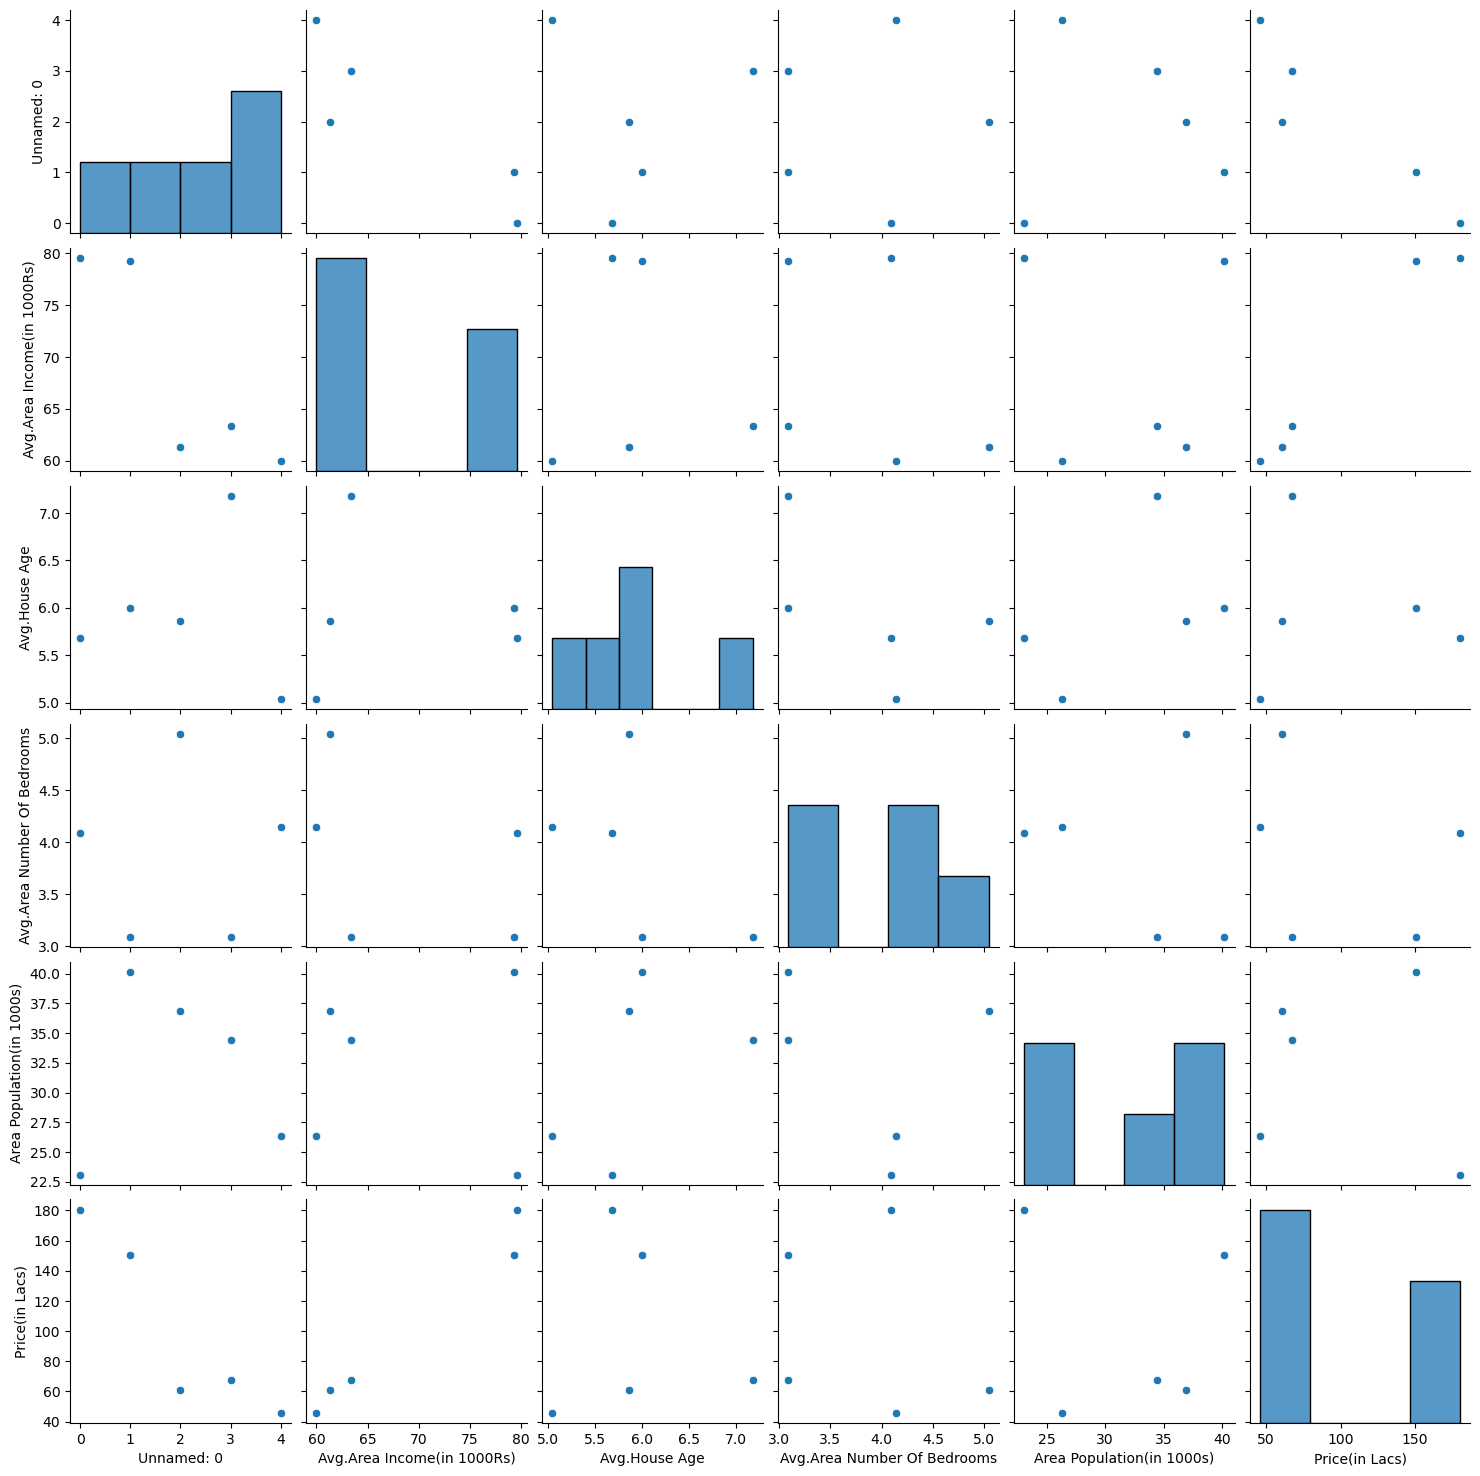

In [6]:
#We will create some simple plot for visualizing the data.
sns.pairplot(HouseDF)

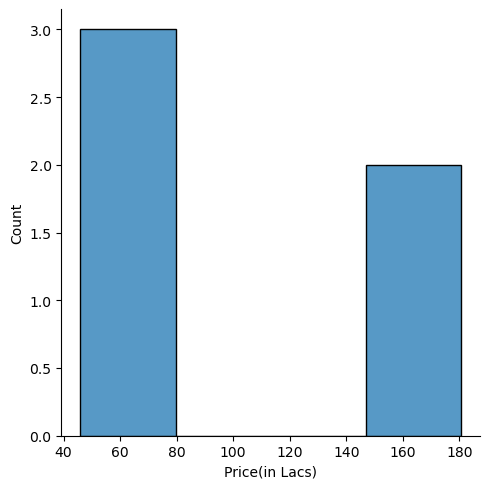

In [7]:
sns.displot(HouseDF['Price(in Lacs)'])

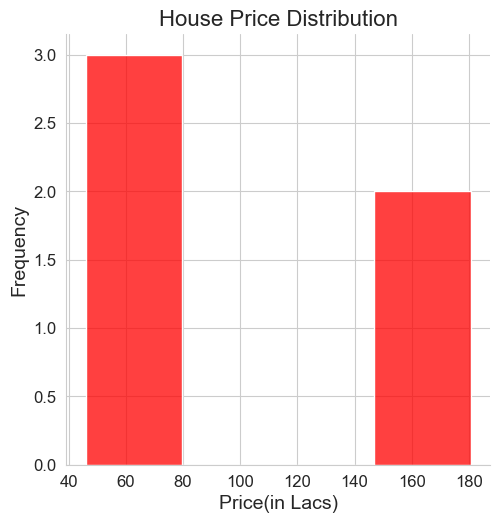

In [22]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
sns.displot(HouseDF['Price(in Lacs)'],color = 'r')
plt.title('House Price Distribution', fontsize = 16)
plt.xlabel('Price(in Lacs)',fontsize = 14)
plt.ylabel('Frequency',fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

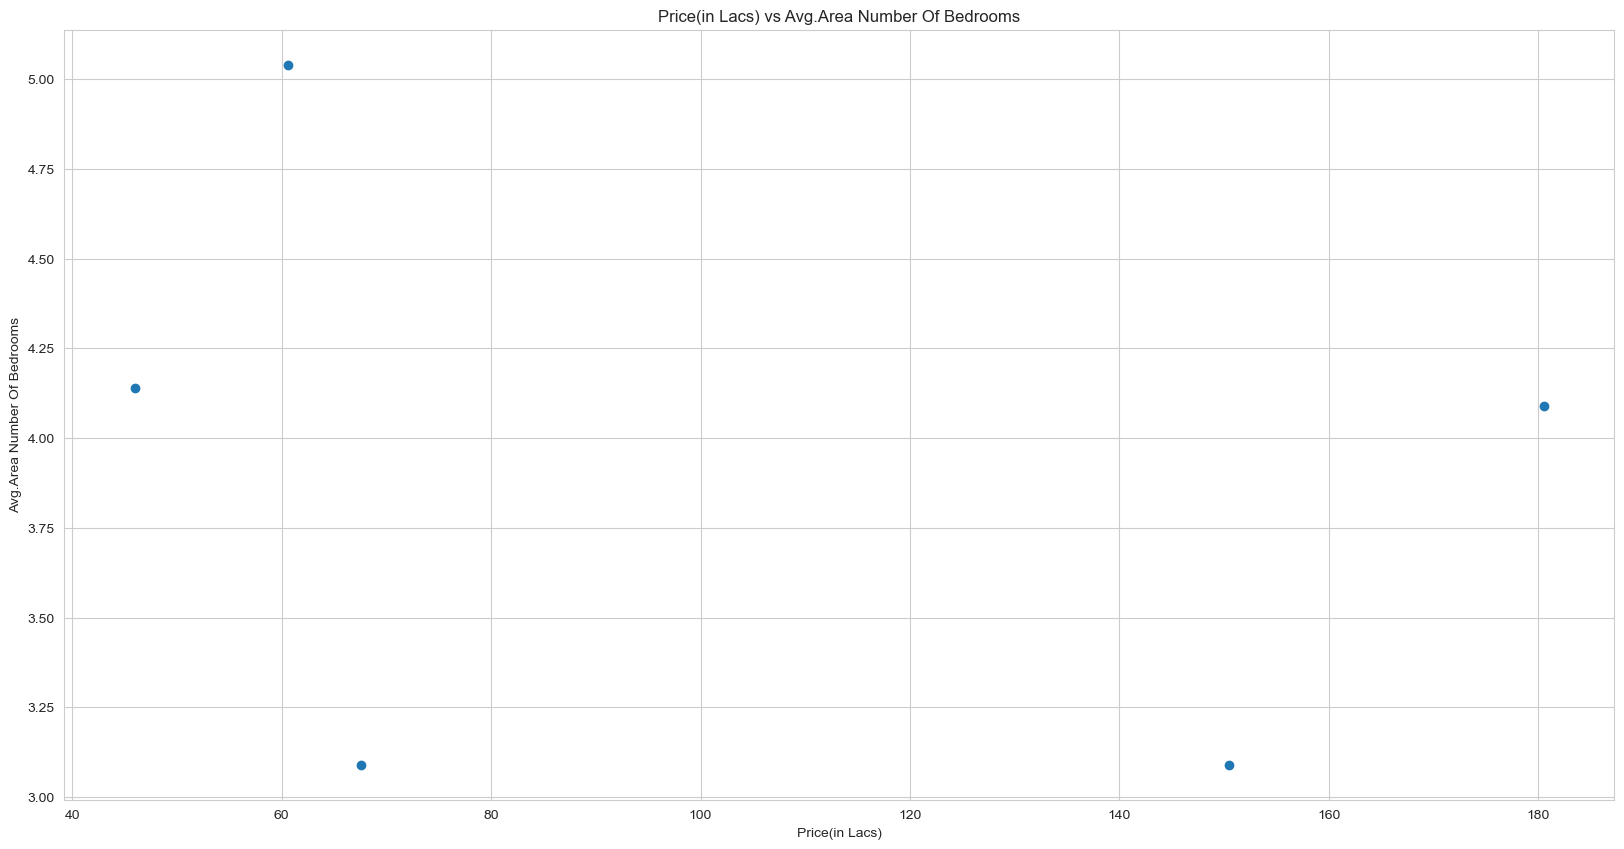

In [24]:
#creating a scatter plot of color intensity vs flavanoids
plt.scatter(HouseDF["Price(in Lacs)"], HouseDF["Avg.Area Number Of Bedrooms"])
plt.title("Price(in Lacs) vs Avg.Area Number Of Bedrooms")
plt.xlabel("Price(in Lacs)")
plt.ylabel("Avg.Area Number Of Bedrooms")
plt.show()

In [8]:
#Training The Data For Linear Regression
X = HouseDF[['Avg.Area Income(in 1000Rs)','Avg.House Age','Avg.Area Number Of Bedrooms','Area Population(in 1000s)']]
Y = HouseDF['Price(in Lacs)']

In [9]:
#Now we will split our dataset into a training set and testing set using sklearn train_test_split(). 
#The training set will be going to use for training the model and testing set for testing the model. 
#We are creating a split of 40% training data and 60% of the training set.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 101)

In [10]:
#We will import and create sklearn linearmodel LinearRegression object and fit the training dataset in it.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [11]:
#Now let’s evaluate the model by checking out its coefficients and how we can interpret them.
print(lm.intercept_)

-364.27624714640183


In [12]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

                             Coefficient
Avg.Area Income(in 1000Rs)      2.855252
Avg.House Age                   3.488426
Avg.Area Number Of Bedrooms    -7.313577
Area Population(in 1000s)       7.221807


In [13]:
#Let’s see out the predictions of our test set and see how well it perform.
predictions = lm.predict(X_test)

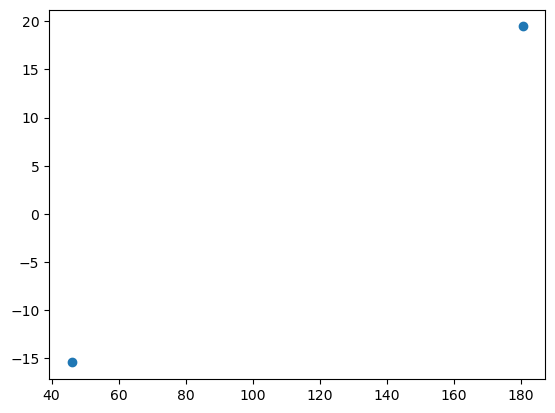

In [14]:
plt.scatter(Y_test,predictions)

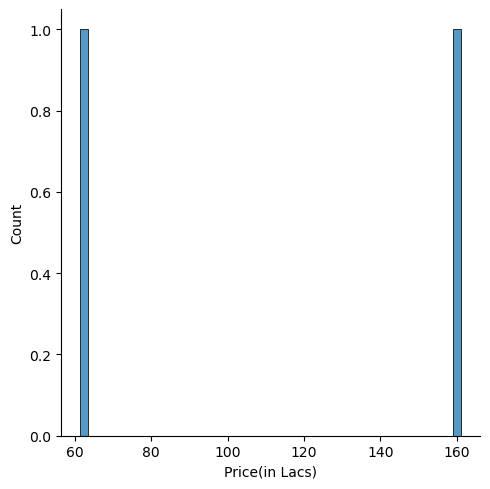

In [15]:
sns.displot((Y_test-predictions),bins=50); 

In [16]:
#Here are three common evaluation metrics for regression problems:

#Mean Absolute Error (MAE) is the mean of the absolute value of the errors:$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
#Mean Squared Error (MSE) is the mean of the squared errors:$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
#Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(Y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 111.25072239881132
MSE: 14858.770737484909
RMSE: 121.89655752926294


In [17]:
#Conclusion
#We have created a Linear Regression Model which we help the real state agent for estimating House price